<a href="https://colab.research.google.com/github/Akale29/dataset/blob/main/roll_no_78.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')
import pandas as pd

# path="/content/drive/MyDrive/Performance.csv"
path = "https://raw.githubusercontent.com/Premyadav02/datasest/main/Performance.csv"
df = pd.read_csv(path)

df.describe

<bound method NDFrame.describe of      math score  phy_score  chem_score
0            72         72          74
1            69         90          88
2            90         95          93
3            47         57          44
4            76         78          75
..          ...        ...         ...
995          88         99          95
996          62         55          55
997          59         71          65
998          68         78          77
999          77         86          86

[1000 rows x 3 columns]>

# **Data Preparation**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
df


,math score,phy_score,chem_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [ ]:
df.rename(columns={"reading score": "phy_score", "writing score": "chem_score", "math score":"math_score"}, inplace=True)
df

,math_score,phy_score,chem_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


**A)Derive an index field and add it to data set**

In [ ]:
# df.set_index("math_score",inplace=True)
df.head(10)

,math_score,phy_score,chem_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


In [ ]:
df.head(10)

,math_score,phy_score,chem_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


**B) Finding out missing values**

In [ ]:
df.isnull()

,math_score,phy_score,chem_score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


**C) Obtain a listing of all records that are outliers according to the any field. Print out a listing of the 10 largest values for that field**

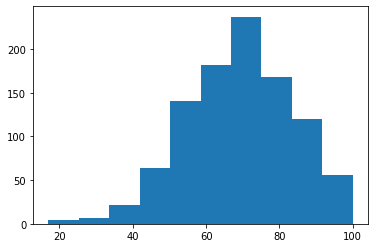

In [ ]:
plt.hist(df.phy_score)
plt.show()

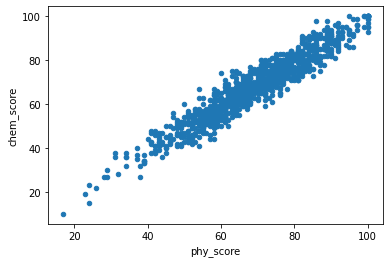

In [ ]:
df.plot(kind = 'scatter', x = 'phy_score', y = 'chem_score')
plt.show()

Text(0.5, 0.98, 'Scatter plot for Physics snd Chemistry score')

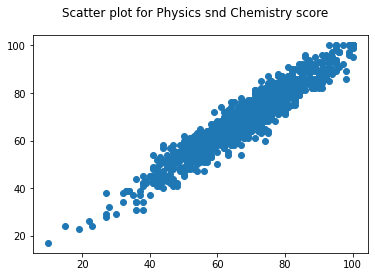

In [ ]:
plt.scatter(y=df['phy_score'], x=df['chem_score'])
plt.suptitle("Scatter plot for Physics snd Chemistry score")

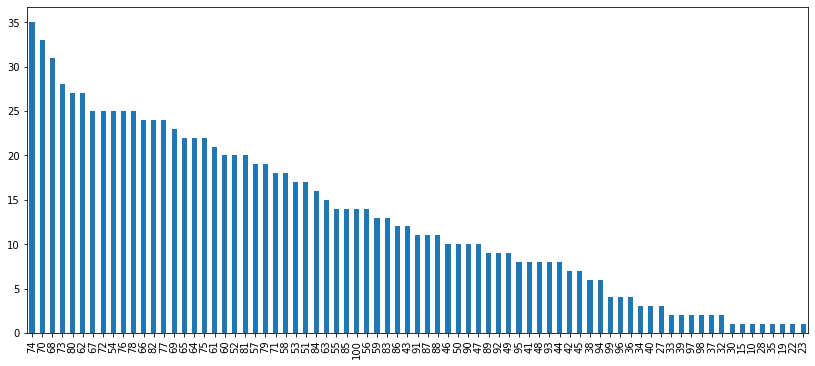

In [ ]:
ax = df['chem_score'].value_counts().plot(kind='bar', figsize=(14,6))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


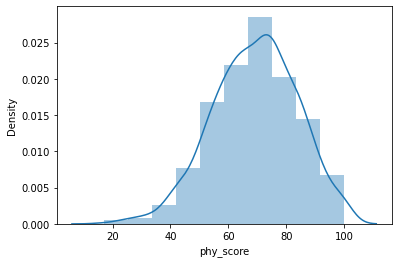

In [ ]:
sns.distplot(df['phy_score'], bins=10, kde=True )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


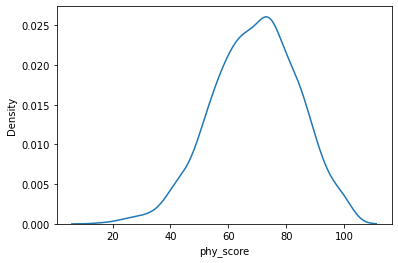

In [ ]:
sns.distplot(a=df['phy_score'], hist=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


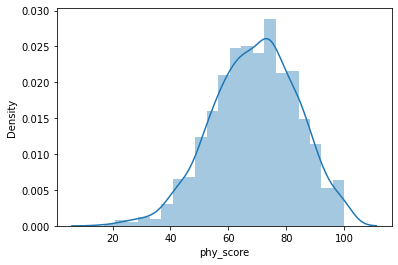

In [ ]:
sns.distplot(a=df['phy_score'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


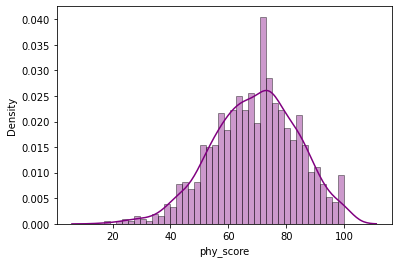

In [ ]:
sns.distplot(a=df["phy_score"], bins=40, color='purple',
             hist_kws={"edgecolor": 'black'})
plt.show()

In [ ]:
print(df.describe())

       math_score    phy_score   chem_score
count  1000.00000  1000.000000  1000.000000
mean     66.08900    69.169000    68.054000
std      15.16308    14.600192    15.195657
min       0.00000    17.000000    10.000000
25%      57.00000    59.000000    57.750000
50%      66.00000    70.000000    69.000000
75%      77.00000    79.000000    79.000000
max     100.00000   100.000000   100.000000


In [ ]:
lowerlimit = df['phy_score'].quantile(0.05)
lowerlimit

44.0

In [ ]:
upperlimit = df['phy_score'].quantile(0.95)
upperlimit

92.0

In [ ]:
df[df['phy_score'] > upperlimit ]

,math_score,phy_score,chem_score
2,90,95,93
6,88,95,92
106,87,100,100
114,99,100,100
122,88,93,93
125,87,95,86
149,100,100,93
165,96,100,100
179,97,100,100
229,88,95,94


In [ ]:
df[(df['phy_score'] > lowerlimit)&(df['chem_score'] < upperlimit)]

,math_score,phy_score,chem_score
0,72,72,74
1,69,90,88
3,47,57,44
4,76,78,75
5,71,83,78
...,...,...,...
994,63,63,62
996,62,55,55
997,59,71,65
998,68,78,77


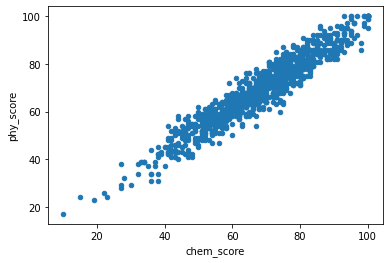

In [ ]:
df.plot(kind = 'scatter', x = 'chem_score', y = 'phy_score')
plt.show()

In [ ]:
df.nlargest(10,['chem_score'])

,math_score,phy_score,chem_score
106,87,100,100
114,99,100,100
165,96,100,100
179,97,100,100
377,85,95,100
403,88,99,100
458,100,100,100
566,92,100,100
685,94,99,100
903,93,100,100


**D) I)Standardize the variable**

In [ ]:
df.head()

,math_score,phy_score,chem_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [ ]:
df_x = df[['chem_score', 'phy_score']]

In [ ]:
df[['chem_score', 'phy_score']] = (df_x-df_x.mean())/df_x.std()

In [ ]:
df_x

,chem_score,phy_score
0,74,72
1,88,90
2,93,95
3,44,57
4,75,78
...,...,...
995,95,99
996,55,55
997,65,71
998,77,78


In [ ]:
df.head()

,math_score,phy_score,chem_score
0,72,0.193902,0.391296
1,69,1.426762,1.312612
2,90,1.769223,1.641653
3,47,-0.833482,-1.582952
4,76,0.604855,0.457104


**D) II) Identifying the outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


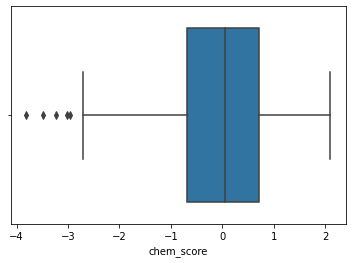

In [ ]:
import seaborn as sns
sns.boxplot(df['chem_score'])

In [ ]:
df_new2 = df.head(10)

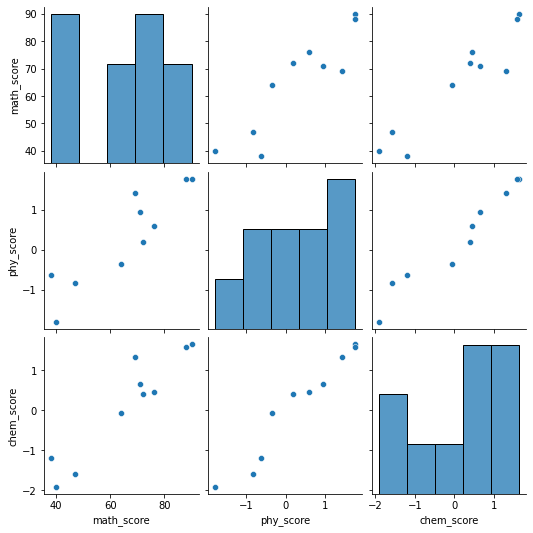

In [ ]:
sns.pairplot(df_new2)

\**Identifying and removing outliers with IQR method.**

In [ ]:
df.shape

(1000, 3)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

math_score    20.000000
phy_score      1.369845
chem_score     1.398426
dtype: float64


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_out.shape

(988, 3)

In [ ]:
df.shape

(1000, 3)

In [ ]:
df_out

,math_score,phy_score,chem_score
0,72,0.193902,0.391296
1,69,1.426762,1.312612
2,90,1.769223,1.641653
3,47,-0.833482,-1.582952
4,76,0.604855,0.457104
...,...,...,...
995,88,2.043192,1.773270
996,62,-0.970467,-0.859061
997,59,0.125409,-0.200978
998,68,0.604855,0.588721


# **Data Visualization**

**Barplot and Contingency Table**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


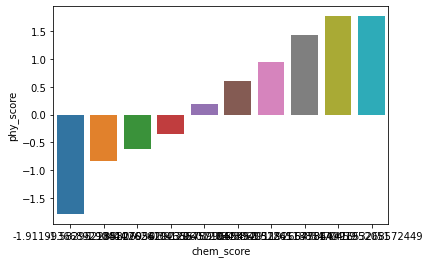

In [ ]:
sns.barplot(df_new2['chem_score'], df_new2['phy_score'])

In [ ]:
df_new2.describe()

,math_score,phy_score,chem_score
count,10.000000,10.000000,10.000000
mean,65.500000,0.310338,0.128063
std,18.416478,1.204655,1.295530
min,38.000000,-1.792374,-1.911994
25%,51.250000,-0.559513,-0.908417
50%,70.000000,0.399378,0.424200
75%,75.000000,1.306901,1.148091
max,90.000000,1.769223,1.641653


In [ ]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   math_score  10 non-null     int64  
 1   phy_score   10 non-null     float64
 2   chem_score  10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 368.0 bytes


In [ ]:
df_new2.dtypes

math_score      int64
phy_score     float64
chem_score    float64
dtype: object

In [ ]:
data_crosstab = pd.crosstab(df_new2['phy_score'],
							df_new2['chem_score'],
							margins = False)
print(data_crosstab)

chem_score  -1.911994  -1.582952  -1.188103  -0.069362   0.391296   0.457104  \
phy_score                                                                      
-1.792374           1          0          0          0          0          0   
-0.833482           0          1          0          0          0          0   
-0.628005           0          0          1          0          0          0   
-0.354036           0          0          0          1          0          0   
 0.193902           0          0          0          0          1          0   
 0.604855           0          0          0          0          0          1   
 0.947316           0          0          0          0          0          0   
 1.426762           0          0          0          0          0          0   
 1.769223           0          0          0          0          0          0   

chem_score   0.654529   1.312612   1.575845   1.641653  
phy_score                                               
-1.79

**Normalize Histogram**

In [ ]:
import matplotlib.pyplot as plt

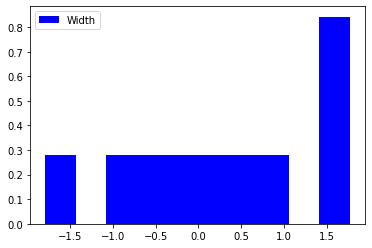

In [ ]:
plt.hist(df_new2['phy_score'], density = True, color = "blue", label = "Width")
plt.legend()
plt.show()

# **Data Modeling**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df

,math_score,phy_score,chem_score
0,72,0.193902,0.391296
1,69,1.426762,1.312612
2,90,1.769223,1.641653
3,47,-0.833482,-1.582952
4,76,0.604855,0.457104
...,...,...,...
995,88,2.043192,1.773270
996,62,-0.970467,-0.859061
997,59,0.125409,-0.200978
998,68,0.604855,0.588721


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:7].values


In [ ]:
X

array([[72.        ,  0.19390156],
       [69.        ,  1.42676207],
       [90.        ,  1.76922332],
       ...,
       [59.        ,  0.12540931],
       [68.        ,  0.60485506],
       [77.        ,  1.15279306]])

In [ ]:
y

array([[72.        ,  0.19390156,  0.39129601],
       [69.        ,  1.42676207,  1.31261189],
       [90.        ,  1.76922332,  1.64165327],
       [47.        , -0.83348219, -1.58295229],
       [76.        ,  0.60485506,  0.45710429],
       [71.        ,  0.94731631,  0.65452912],
       [88.        ,  1.76922332,  1.57584499]])

In [ ]:
print(X.shape)
print(y.shape)

if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(1000, 2)
(7, 3)
X and y rows are mismatched, check dataset again


# **3. Modeling**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df

,math_score,phy_score,chem_score
0,72,0.193902,0.391296
1,69,1.426762,1.312612
2,90,1.769223,1.641653
3,47,-0.833482,-1.582952
4,76,0.604855,0.457104
...,...,...,...
995,88,2.043192,1.773270
996,62,-0.970467,-0.859061
997,59,0.125409,-0.200978
998,68,0.604855,0.588721


In [ ]:
df

,math_score,phy_score,chem_score
0,72,0.193902,0.391296
1,69,1.426762,1.312612
2,90,1.769223,1.641653
3,47,-0.833482,-1.582952
4,76,0.604855,0.457104
...,...,...,...
995,88,2.043192,1.773270
996,62,-0.970467,-0.859061
997,59,0.125409,-0.200978
998,68,0.604855,0.588721


In [ ]:
lc=LabelEncoder()
df["math_score"]=lc.fit_transform(df["math_score"])

In [ ]:
# x=((df.loc[:,df.columns!="chem_score"]).astype(int)).values[:,0:]
# y=df["chem_score"].values

In [ ]:
df.math_score.unique()

array([52, 49, 70, 27, 56, 51, 68, 20, 44, 18, 38, 45, 58, 30,  2, 26, 34,
       46, 24, 54, 53, 47, 50, 42, 43, 36, 77, 61, 55, 37, 35, 33, 39, 62,
       57, 13, 32,  0, 59, 19, 25, 40, 41, 21, 29, 11, 60, 22,  8, 23, 48,
       65, 78, 67, 31, 79, 64, 71, 63, 69,  4, 80, 76, 74, 28, 15, 14, 66,
       72, 17,  9,  6,  7, 75, 16, 10, 12, 73,  3,  5,  1])

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

##A) Partition data set


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
y = df.math_score

In [ ]:
x = df.drop('phy_score', axis=1)

In [ ]:
x.head()

,math_score,chem_score
0,52,0.391296
1,49,1.312612
2,70,1.641653
3,27,-1.582952
4,56,0.457104


In [ ]:
y.head()

0    52
1    49
2    70
3    27
4    56
Name: math_score, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [ ]:
print("shape of original dataset :", df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (1000, 3)
shape of input - training set (750, 2)
shape of output - training set (750,)
shape of input - testing set (250, 2)
shape of output - testing set (250,)


In [ ]:
x

,math_score,chem_score
0,52,0.391296
1,49,1.312612
2,70,1.641653
3,27,-1.582952
4,56,0.457104
...,...,...
995,68,1.773270
996,42,-0.859061
997,39,-0.200978
998,48,0.588721


In [ ]:
len(x_train)

750

In [ ]:
print(x.shape)
print(y.shape)

(1000, 2)
(1000,)


# B) Total number of records in the training data set

In [ ]:
len(x_train)

750

In [ ]:
len(y_train)

750

In [ ]:
y

0      52
1      49
2      70
3      27
4      56
       ..
995    68
996    42
997    39
998    48
999    57
Name: math_score, Length: 1000, dtype: int64

In [ ]:
print(x.shape)
print(y.shape)

if x.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(1000, 2)
(1000,)


In [ ]:
print("Total number of reords in traning dataset: {}".format(len(x)))

Total number of reords in traning dataset: 1000


# C) Performing a two-sample Z-test

In [ ]:
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ztest ,pval1 = stests.ztest(df['phy_score'], x2=df['math_score'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


# **4. Implementation of Statistical Hypothesis Test using Scipy and Sci-kit learn**

# Correlation Test

# Pearson's correlation test

In [ ]:
#Pearson's correlation test
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

Pearson correlation: 0.8009956145274396
T Test and P value: Ttest_indResult(statistic=-97.19144670993515, pvalue=0.0)


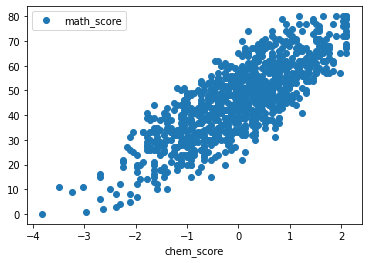

In [ ]:
df.plot("chem_score","math_score",style='o') 
print("Pearson correlation:",df["chem_score"].corr(df["math_score"]))
print("T Test and P value:",stats.ttest_ind(df["chem_score"],df["math_score"]))

# Spearman's Rank Correlation Test

In [ ]:
from scipy.stats import spearmanr
data1 = df["phy_score"]
data2 = df["math_score"]
stat, p = spearmanr(data1, data2)
print('stat={0:.3g}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.804, p=0.804
Probably dependent


# Kendall's Rank Correlation Test

In [ ]:
from scipy.stats import kendalltau
stat, p = kendalltau(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.617, p=0.617
Probably dependent


# Chisquared test

In [ ]:
import scipy.stats

In [ ]:
scipy.stats.chisquare(df["math_score"].value_counts())

Power_divergenceResult(statistic=607.04, pvalue=5.472022518887715e-82)

In [ ]:
# x = df.drop('gender', axis=1)

In [ ]:
df


,math_score,phy_score,chem_score
0,52,0.193902,0.391296
1,49,1.426762,1.312612
2,70,1.769223,1.641653
3,27,-0.833482,-1.582952
4,56,0.604855,0.457104
...,...,...,...
995,68,2.043192,1.773270
996,42,-0.970467,-0.859061
997,39,0.125409,-0.200978
998,48,0.604855,0.588721


# **5. Regression Analysis**

##A) Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(x_train)
xtest = sc_x.transform(x_test)
print (xtrain[0:10, :])


[[-0.09450428  1.04420038]
 [-0.02807672 -0.27679192]
 [ 0.03835085 -0.34284154]
 [ 0.76905402  0.78000192]
 [ 1.49975719  0.91210115]
 [ 1.96475012  2.03494461]
 [ 0.56977134 -0.27679192]
 [ 0.03835085 -0.07864308]
 [-0.49306964 -0.47494077]
 [-1.29020038 -1.20148653]]


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.108


##B) Apply regression Model techniques to predict the data on above dataset

In [ ]:
# input=[[10.9,12.8,5,4.7]]
# ot=classifier.predict(input)
# print("The weather is:")
# if(ot==0):
#     print("Drizzle")
# elif(ot==1):
#     print("Fog")
# elif(ot==2):
#     print("Rain")
# elif(ot==3):
#     print("snow")
# else:
#     print("Sun")

# **6. Classification Modelling**

KNN classifer

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:94.80%


In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:94.80%


#**7. Clustering**

##A) Clustering algorithms for unsupervised classification

In [ ]:
#Select Features of Interest for Clustering
features = ['math_score', 'phy_score', 'math_score']

In [ ]:
select_df = df[features]

In [ ]:
select_df.columns

Index(['math_score', 'phy_score', 'math_score'], dtype='object')

In [ ]:
select_df.head()

,math_score,phy_score,math_score
0,52,0.193902,52
1,49,1.426762,49
2,70,1.769223,70
3,27,-0.833482,27
4,56,0.604855,56


In [ ]:
#Scale the Features using StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [ ]:
X = StandardScaler().fit_transform(select_df)
X

array([[ 0.39103263,  0.19399858,  0.39103263],
       [ 0.19067432,  1.42747598,  0.19067432],
       [ 1.59318246,  1.77010859,  1.59318246],
       ...,
       [-0.4771867 ,  0.12547206, -0.4771867 ],
       [ 0.12388822,  0.60515772,  0.12388822],
       [ 0.72496313,  1.15336989,  0.72496313]])

In [ ]:
#Use k-Means Clustering
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


In [ ]:
#centers of 12 clusters
centers = model.cluster_centers_
centers

array([[-0.39415533,  0.10571667, -0.39415533],
       [ 0.84407649,  1.19999619,  0.84407649],
       [-1.69722566, -1.41637469, -1.69722566],
       [-0.9199877 , -1.40370197, -0.9199877 ],
       [ 1.42118537,  0.86612173,  1.42118537],
       [ 0.25609744, -0.30526608,  0.25609744],
       [-0.33025727, -0.74970952, -0.33025727],
       [-2.5316544 , -2.50464112, -2.5316544 ],
       [ 0.12772021,  0.66020361,  0.12772021],
       [-1.08903356, -0.54137205, -1.08903356],
       [ 0.73109655,  0.28560036,  0.73109655],
       [ 1.83260433,  1.76364383,  1.83260433]])

In [ ]:

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('Avg math_score')

	# Zip with a column called 'Avg Salary' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['Avg math_score'] = P['Avg math_score'].astype(int)
	return P

In [ ]:
# Function that creates Parallel Plots

def parallel_plot(df1):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df1)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(df1, 'Avg math_score', color = my_colors, marker='o')

In [ ]:
P = pd_centers(features, centers)
P

,math_score,phy_score,math_score,Avg math_score
0,-0.394155,0.105717,-0.394155,0
1,0.844076,1.199996,0.844076,1
2,-1.697226,-1.416375,-1.697226,2
3,-0.919988,-1.403702,-0.919988,3
4,1.421185,0.866122,1.421185,4
5,0.256097,-0.305266,0.256097,5
6,-0.330257,-0.749710,-0.330257,6
7,-2.531654,-2.504641,-2.531654,7
8,0.127720,0.660204,0.127720,8
9,-1.089034,-0.541372,-1.089034,9


##B) Plot the cluster data

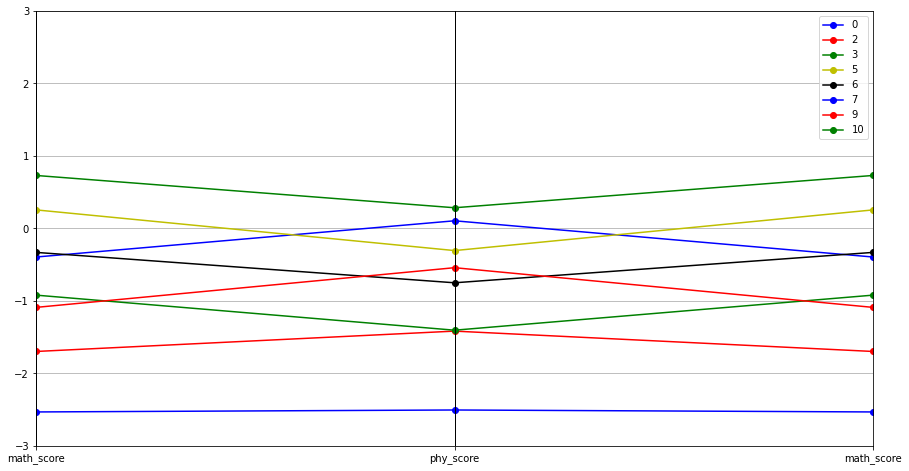

In [ ]:

parallel_plot(P[P['phy_score'] < 0.5])

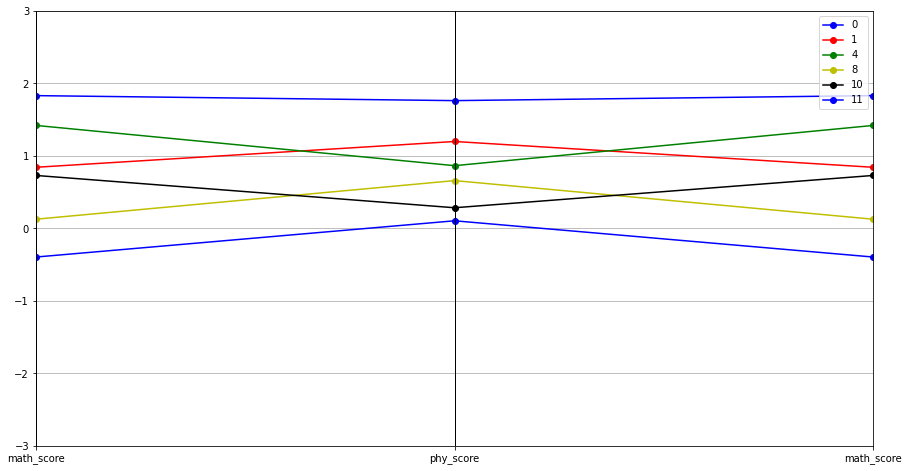

In [ ]:
#warm days
parallel_plot(P[P['phy_score'] > -0.1])

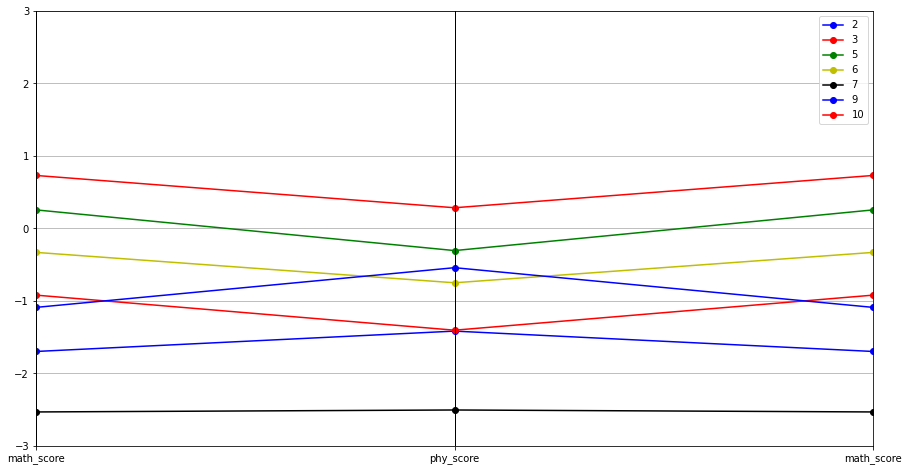

In [ ]:
#cool days
parallel_plot(P[(P['Avg math_score'] > 0.5) & (P['phy_score'] < 0.5)])

#**8.  Using any machine learning techniques using available data set to develop a recommendation   system**

# Coursera Course Recommendation 


## 1. Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
print("The necessary packages are included successfully!")

The necessary packages are included successfully!


## 2. Importing the dataset

In [ ]:
url = 'https://raw.githubusercontent.com/Premyadav02/miniproject-DS/main/Coursera.csv'
df = pd.read_csv(url)
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


## 3. Data Cleaning

In [ ]:
# This dataframe contains some useless columns which must be dropped for a better analytics result
uc = ['Course URL']  # uc means useless columns
df = df.drop(columns=uc)
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


## 4. Data Inferencing

In [ ]:
r,c = df.shape
print("Number of customers  = ",r)
print("Number of parameters = ",c)

Number of customers  =  3522
Number of parameters =  6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course Description  3522 non-null   object
 5   Skills              3522 non-null   object
dtypes: object(6)
memory usage: 165.2+ KB


## 5. NULL Removal / Checking

In [ ]:
print("Are there any missing values in the dataset ?",df.isna().values.any())

Are there any missing values in the dataset ? False


In [ ]:
# complete summary of dataset
df.describe().T

,count,unique,top,freq
Course Name,3522,3416,Google Cloud Platform Fundamentals: Core Infra...,8
University,3522,184,Coursera Project Network,562
Difficulty Level,3522,5,Beginner,1444
Course Rating,3522,31,4.7,740
Course Description,3522,3397,This course introduces you to important concep...,8
Skills,3522,3424,Google Cloud Platform Big Data Cloud Infrast...,8


## 6. Data Visualization

In [ ]:
data = df['Difficulty Level'].value_counts()
data

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

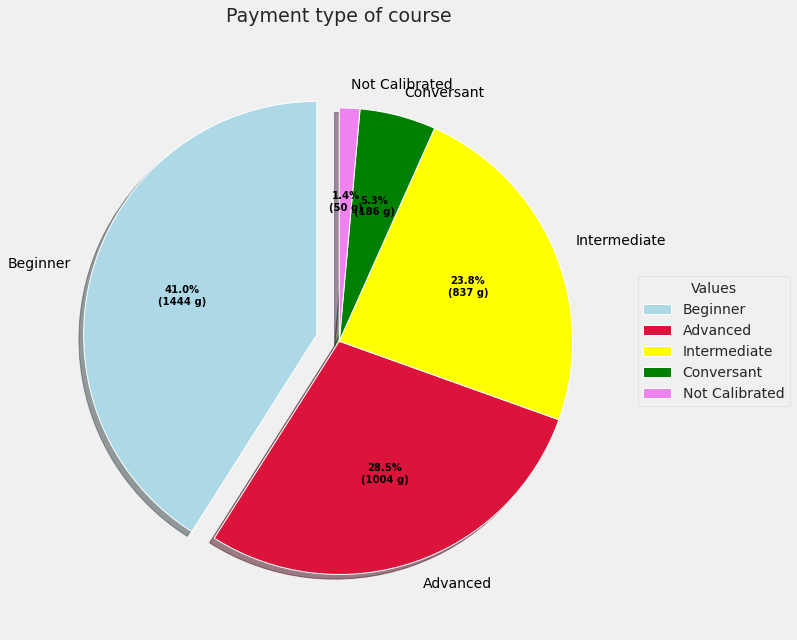

In [ ]:
mag = ['Beginner','Advanced','Intermediate','Conversant','Not Calibrated']
  
data = [1444,1005,837,186,50]
explode = (0.1,0.0,0.0,0.0,0.0) 
  
# Creating color parameters 
colors = ("lightblue","crimson","yellow","green","violet") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = mag, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, mag, 
          title ="Values", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 10, weight ="bold") 
ax.set_title("Payment type of course\n",size=19) 
  
# show plot 

plt.show()

In [ ]:
df['Course Rating'].value_counts()

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [ ]:
df = df[df['Course Rating'] != 'Not Calibrated']

In [ ]:
df['Course Rating'] = df['Course Rating'].astype(float)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


Text(0.5, 1.0, 'Count of course types\n')

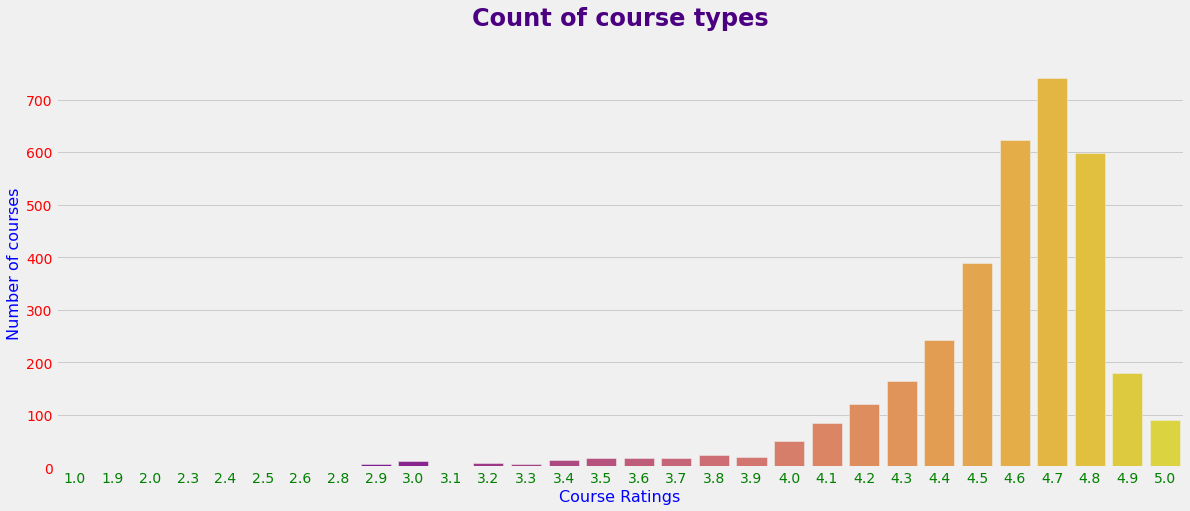

In [ ]:
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='Course Rating',palette='plasma')
plt.xlabel('Course Ratings',fontsize='16',color='blue')
plt.ylabel('Number of courses',fontsize='16',color='blue')
plt.xticks(fontsize='14',color='green')
plt.yticks(fontsize='14',color='red')
plt.title("Count of course types\n",fontsize=24,fontweight='bold',color='indigo')

## 7. Filterning required data

In [ ]:
df2 = df[df['Course Rating'] > 4.0]
df2.head(10)

,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
5,Building Test Automation Framework using Selen...,Coursera Project Network,Beginner,4.7,Selenium is one of the most widely used functi...,maintenance test case test automation scree...
7,"Programming Languages, Part A",University of Washington,Intermediate,4.9,This course is an introduction to the basic co...,inference ml (programming language) higher-o...
8,The Roles and Responsibilities of Nonprofit Bo...,The State University of New York,Intermediate,4.3,This course provides a more in-depth look at t...,Planning Peer Review fundraising strategic ...
11,Esports Management Capstone Project,"University of California, Irvine",Beginner,4.4,We will analyze the pros and cons of creating ...,Average Planning Leadership and Management ...
13,Business Statistics and Analysis Capstone,Rice University,Beginner,4.7,The Business Statistics and Analysis Capstone ...,Statistical Analysis Microsoft Excel busines...


## 8. Making NLP Model for Recommendation Engine

In [ ]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(df['Course Name'])
course_user = df.pivot_table(columns='Course Name',values='Course Rating')
course_user.head()

Course Name,"""Making"" Progress Teach-Out",3-Axis Machining with Autodesk Fusion 360,3D Art and Audio Pipeline,3D CAD Application,3D CAD Fundamental,3D Data Visualization for Science Communication,3D Graphics in Android: Sensors and VR,3D Interaction Design in Virtual Reality,3D Interactions and Navigation,3D Model Creation with Autodesk Fusion 360,...,Writing in English at University,Writing in First Person Point of View,Writing your World: Finding yourself in the academic space,e-Learning Ecologies: Innovative Approaches to Teaching and Learning for the Digital Age,eHealth: More than just an electronic record,iOS App Development Basics,iOS App Store & In-App Purchases,iOS Project: Transreality Game,iPad Music Player in XD,idea 2 IMPACT: An Introduction to Translating Assistive Health Technologies and Other Products
Course Rating,4.2,4.9,4.3,4.9,4.6,4.3,4.6,4.5,4.5,4.7,...,4.7,4.6,4.7,4.2,4.5,4.2,4.5,4.9,4.4,1.0


In [ ]:
df = df.rename(columns={'Course Name':'course_title'})

## 9. Running Recommendation Engine on variety of course genres

### TOPIC : 1 TV shows and telecast

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]
print("--------------- Similar courses to your search --------------:\n")
recommendations('Write A Feature Length Screenplay For Film Or Television')

--------------- Similar courses to your search --------------:



149                      Scandinavian Film and Television
2485                                  Feature Engineering
1481    Script Writing: Write a Pilot Episode for a TV...
2858         Machine Learning Feature Selection in Python
3070            Perform Feature Analysis with Yellowbrick
1854    Data Processing and Feature Engineering with M...
1629                               Write Your First Novel
650                  Write Professional Emails in English
2385                     Getting Your Film off the Ground
2472    Python: Imputations, Feature Creation & Statis...
Name: course_title, dtype: object

### TOPIC : 2 Database and related courses 

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]
print("--------------- Similar courses to your search --------------:\n")
recommendations('Retrieve Data using Single-Table SQL Queries')

--------------- Similar courses to your search --------------:



3272        Retrieve Data with Multiple-Table SQL Queries
1162       Advanced SQL Retrieval Queries in SQLiteStudio
1580                                 SQL for Data Science
3482                SQL for Data Science Capstone Project
2892                           Manipulating Data with SQL
2611                          Analyzing Big Data with SQL
2934    How to Design a Space-Saving Table Using SketchUp
1033                   Databases and SQL for Data Science
1379                   Databases and SQL for Data Science
1380                   Databases and SQL for Data Science
Name: course_title, dtype: object

### TOPIC : 3 Finance related

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]
print("--------------- Similar courses to your search --------------:\n")
recommendations('Finance for Managers')

--------------- Similar courses to your search --------------:



419                    Finance for Non-Financial Managers
2082                Finance for Non-Finance Professionals
3448                                 Finance for Startups
3094    Coding for Designers, Managers, & Entrepreneurs I
653     Coding for Designers, Managers, & Entrepreneur...
1659    Coding for Designers, Managers, & Entrepreneur...
2851                        Finance for Everyone: Markets
3110                          Finance For Everyone: Value
959                 Finance for Everyone Capstone Project
2188    Human Resources Management Capstone: HR for Pe...
Name: course_title, dtype: object

#**9. Exploratory data analysis using Apache Spark and Pandas**

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 18.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=ccebe5963f062432369650a2f48697581e0629cc3face63172dd421b8a52a773
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
import os
import pandas as pd
import numpy as np

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

In [ ]:
s1 = SparkSession.builder.master("local[2]").appName("chem_score").getOrCreate()

In [ ]:
s1

In [ ]:
sc = s1.sparkContext
sc

<SparkContext master=local[2] appName=chem_score>

In [ ]:
sqlContext = SQLContext(s1.sparkContext)
sqlContext

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


#**10. Batch and Streamed Data Analysis using Spark**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = s1.read.csv("/content/drive/MyDrive/Performance.csv", header=True, inferSchema=True)

In [ ]:
df.take(3)

[Row(math score=72, phy_score=72, chem_score=74),
 Row(math score=69, phy_score=90, chem_score=88),
 Row(math score=90, phy_score=95, chem_score=93)]

In [ ]:
#Show column details
df.printSchema()

root
 |-- math score: integer (nullable = true)
 |-- phy_score: integer (nullable = true)
 |-- chem_score: integer (nullable = true)



In [ ]:
#Display Rows
df.show(5)

+----------+---------+----------+
|math score|phy_score|chem_score|
+----------+---------+----------+
|        72|       72|        74|
|        69|       90|        88|
|        90|       95|        93|
|        47|       57|        44|
|        76|       78|        75|
+----------+---------+----------+
only showing top 5 rows



In [ ]:
#Number of rows in DF
df.count()

1000

In [ ]:
#Display specific columns
# df.select("math_score,"phy_score" ,"chem_score").show(5)

In [ ]:
#Describing the columns
df.describe().show()

+-------+------------------+------------------+-----------------+
|summary|        math score|         phy_score|       chem_score|
+-------+------------------+------------------+-----------------+
|  count|              1000|              1000|             1000|
|   mean|            66.089|            69.169|           68.054|
| stddev|15.163080096009454|14.600191937252223|15.19565701086966|
|    min|                 0|                17|               10|
|    max|               100|               100|              100|
+-------+------------------+------------------+-----------------+



In [ ]:
#Distinct values for Categorical columns
df.select("phy_score").distinct().show()

+---------+
|phy_score|
+---------+
|       31|
|       85|
|       65|
|       53|
|       78|
|       34|
|       81|
|       28|
|       76|
|       26|
|       44|
|       91|
|       93|
|       47|
|       52|
|       86|
|       40|
|       94|
|       57|
|       54|
+---------+
only showing top 20 rows



In [ ]:
#Aggregate with Groupby
from pyspark.sql import functions as F
df.groupBy("phy_score").agg(F.sum("chem_score")).show()

+---------+---------------+
|phy_score|sum(chem_score)|
+---------+---------------+
|       31|             74|
|       85|           1510|
|       65|           1202|
|       53|            678|
|       78|           2083|
|       34|            142|
|       81|           1976|
|       28|             27|
|       76|           1839|
|       26|             22|
|       44|            168|
|       91|            530|
|       93|            555|
|       47|            203|
|       52|            783|
|       86|           1624|
|       40|             44|
|       94|            277|
|       57|            920|
|       54|            955|
+---------+---------------+
only showing top 20 rows



In [ ]:
#Counting and Removing Null values
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+----------+---------+----------+
|math score|phy_score|chem_score|
+----------+---------+----------+
|         0|        0|         0|
+----------+---------+----------+



In [ ]:
import seaborn as sns
import matplotlib.pyplot as pl

In [ ]:
result_df = df.groupBy("chem_score").count().sort("chem_score", ascending=False)

In [ ]:
result_df.show(5)

+----------+-----+
|chem_score|count|
+----------+-----+
|       100|   14|
|        99|    4|
|        98|    2|
|        97|    2|
|        96|    4|
+----------+-----+
only showing top 5 rows



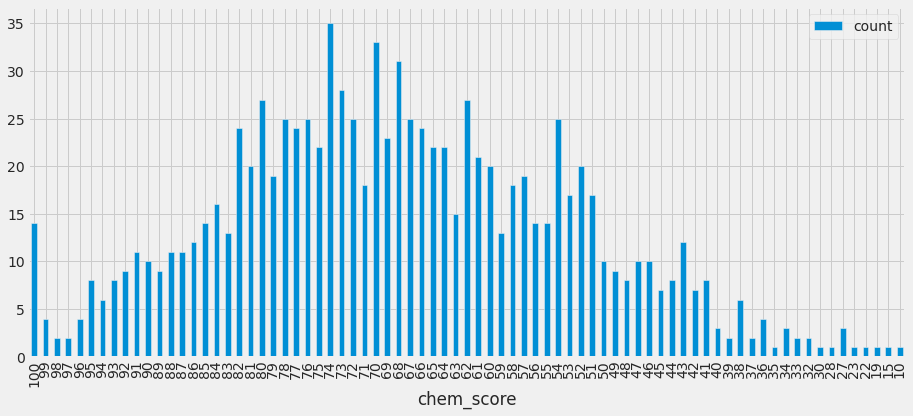

In [ ]:
result_df.toPandas().plot.bar(x='chem_score',figsize=(14, 6))

In [ ]:
s1.stop()